In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Form Dataframe
data = [[50, 0],[60,0],[75,0],[80,0],
        [110, 1],[155,1],[120,1],[130,1]]
df = pd.DataFrame(data,columns=['weight','obesse'])

In [3]:
# View Dataframe
df

,weight,obesse
0,50,0
1,60,0
2,75,0
3,80,0
4,110,1
5,155,1
6,120,1
7,130,1


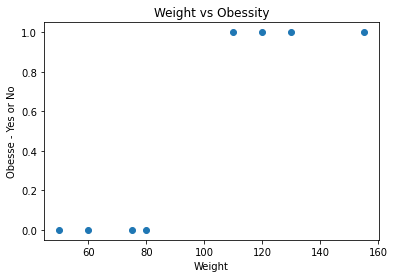

In [4]:
# Plot the dataset
plt.scatter(df.weight, df.obesse)
plt.title('Weight vs Obessity')
plt.xlabel('Weight')
plt.ylabel('Obesse - Yes or No')
plt.show()

In [5]:
# separate x, y to train the model 
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [6]:
# Apply linear regression model
linearRegressor = LinearRegression()
linearRegressor.fit(x, y)

LinearRegression()

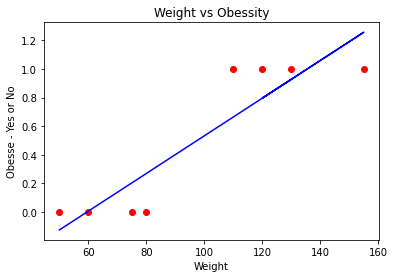

In [7]:
# Plot the dataset a;ong with the best fit line. 
plt.scatter(x, y, color = 'red')
plt.plot(x, linearRegressor.predict(x), color = 'blue')
plt.title('Weight vs Obessity')
plt.xlabel('Weight')
plt.ylabel('Obesse - Yes or No')
plt.show()

In [8]:
# Threshold of 0.5 obtained at 100 weight
linearRegressor.predict(np.array(100).reshape(1,-1))

array([0.53289474])

In [9]:
# Slope
linearRegressor.coef_

array([0.01315789])

In [10]:
# Add some extreme values(outliers)
x_new = np.append(x, [500])
x_new = np.append(x_new, [450])
y_new = np.append(y, [1])
y_new = np.append(y_new, [1])

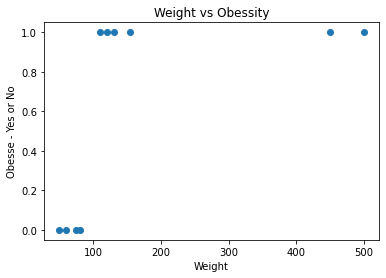

In [11]:
# Plot the new dataset
plt.scatter(x_new, y_new)
plt.title('Weight vs Obessity')
plt.xlabel('Weight')
plt.ylabel('Obesse - Yes or No')
plt.show()

In [12]:
# Fit new data points i.e apply linear regression to new dataset.
lr = LinearRegression()
lr_new = lr.fit(x_new.reshape(-1, 1), y_new.reshape(-1, 1))

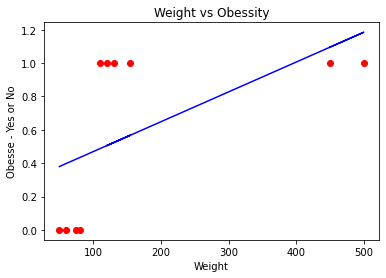

In [13]:
# Plot the new dataset and plot the best fit line obtained
plt.scatter(x_new, y_new, color = 'red')
plt.plot(x_new, lr_new.predict(x_new.reshape(-1, 1)), color = 'blue')
plt.title('Weight vs Obessity')
plt.xlabel('Weight')
plt.ylabel('Obesse - Yes or No')
plt.show()

In [14]:
# Slope
lr_new.coef_

array([[0.00178841]])

In [15]:
# The difference between new slope and old slope of best fit line 
# Since the difference is zero, we can say that the new slope has decreased
# Slope decreased due to addition of extreme values.

lr_new.coef_ - linearRegressor.coef_

array([[-0.01136949]])

In [16]:
# The threshold of 0.5 has shifted from 100 to 120. 
# The Linear Model fluctuates the threshold values(due to extreme points)
# Therefore, linear regression fails in classification. 
lr.predict(np.array(120).reshape(1,-1))

array([[0.50521444]])